<a href="https://colab.research.google.com/github/muratkakun/Machine-Learning/blob/master/HW6_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HW6 -CNNs**

1) Read and load malaria data. Check some images, label, distribution.

['X', 'y', 'full_labels', 'label_names']
(8724, 28, 28, 3)
(8724,)
[ 9 20 19 ... 20 18 20]
['P.Vivax ring' 'P.Vivax troph' 'P.Vivax schiz' 'P.Vivax gametocyte'
 'P.Ovale ring' 'P.Ovale troph' 'P.Ovale schiz' 'P.Ovale gametocyte'
 'P.Falciparum ring' 'P.Falciparum troph' 'P.Falciparum schiz'
 'P.Falciparum gametocyte' 'P.Malariae ring' 'P.Malariae troph'
 'P.Malariae schiz' 'P.Malariae gametocyte' 'NonPar white blood cell'
 'NonPar platelet' 'NonPar artefact' 'NonPar incomplete or empty']


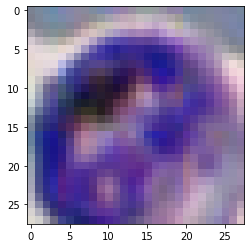

1


In [36]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

a = np.load('malaria_set.npz')

print(a.files) # this shows the zip
print(a['X'].shape) # image data
print(a['y'].shape) # simplified binary labels 1:parasite, 0:non-parasite
print(a['full_labels']) #full_labels 1:parasite, 0:non-parasite see label_names
print(a['label_names']) #full_labels 1:parasite, 0:non-parasite see label_names

X = a['X']
Y = a['y']
full_labels = a['full_labels']
label_names = a['label_names']
index = 10
image = X[index]
image = np.array(image, dtype='int')
pixels = image.reshape((28, 28, 3))

plt.imshow(pixels)
plt.show()

print(Y[index])


2) Divide the data into train and test bins. 70-30 can be a good ratio. Use a fixed  random seed (e.g.11)

In [37]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


batch_tensor = tf.reshape(X_train, [y_train.size, 28, 28, 3])
X_train = tf.image.resize_images(batch_tensor, [32,32])

batch_tensor = tf.reshape(X_test, [y_test.size, 28, 28, 3])
X_test = tf.image.resize_images(batch_tensor, [32,32])

X_train, X_test = X_train / 255.0, X_test / 255.0
print(X_train.shape, y_train.size)
print(X_test.shape, y_test.shape)

(6106, 32, 32, 3) 6106
(2618, 32, 32, 3) (2618,)


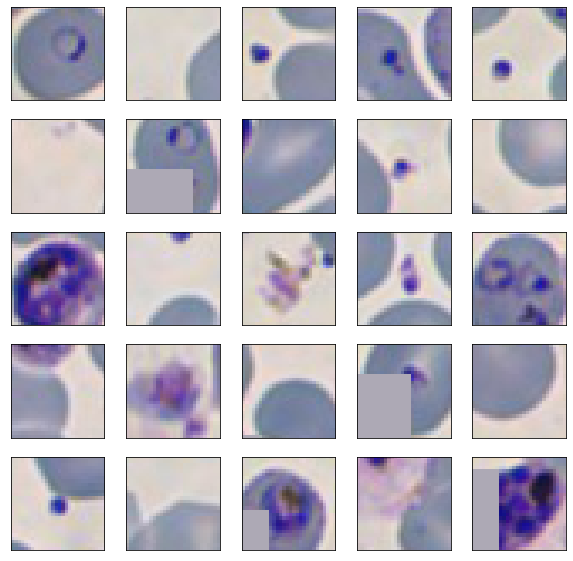

In [38]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i], cmap=plt.cm.binary)
    #plt.xlabel(label_names[full_labels[0]])
plt.show()

3) Create a CNN to classify malaria images.
The network can be simple 2 conv layers+ max pool+ dense+dense.
You should apply basic preprocess (remove mean, and normalize) to data

Show training and testing curves. Report train and test accuracy.

Choose numfilters, filtersize, maxpool as you wish.

In [39]:

model = tf.keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(20, activation='relu'))
#model.add(tf.keras.layers.Dense(64, input_shape=(28,28,3) , activation = 'relu'))
#model.add(tf.keras.layers.Dense(10, activation = 'relu'))
#model.add(tf.keras.layers.Dense(3, activation = 'softmax'))

model.summary()

model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )
history = model.fit(X_train, y_train, epochs=10, steps_per_epoch=10, validation_data=(X_test, y_test))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dense_22 (Dense)             (None, 14, 14, 64)        2112      
_________________________________________________________________
dense_23 (Dense)             (None, 14, 14, 20)        1300      
Total params: 13,556
Trainable params: 13,556
Non-trainable params: 0
_________________________________________________________________
Train on 10 samples, validate on 2618 samples
Epoch 1/10


InvalidArgumentError: ignored